In [249]:
#呼叫所需套件
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats

In [250]:
type = ['Semi-Conductor 202211', 'Finance 202211', 'Shipping  202211']
path = os.getcwd() + '\\data\\total\\'
print(path)

# loop over the list of xlsx files
# 0 = Semi-Conductor, 1 = Finance, 2 = Shipping
# sample_data = glob.glob(os.path.join(path, "*.xlsx"))
# print("sample_data: ",sample_data)
# for f in sample_data:
#   df = pd.read_xlsx(f)


d:\USER\Documents\#tmp\python\python-webstorm-TEJ-Banking-and-Finance\data\total\


In [251]:
# 呼叫xlsx檔
timeType = ['分','日','周', '月', '季', '年']
# data2801 = pd.read_excel("path[]hw2_TEJ_excel.xlsx",sheet_name="2357華碩")
# data2498 = pd.read_excel("hw2_TEJ_excel.xlsx",sheet_name="2498宏達電")
# data9999 = pd.read_excel("hw2_TEJ_excel.xlsx",sheet_name="Y9999加權指數")
# file_list = ["2603.csv", "2607.csv", "2608.csv", "2642.csv", "5607.csv"]
file_list = ["2603"+timeType[0]+ ".xlsx", "2607"+timeType[0]+".xlsx", "2608"+timeType[0]+".xlsx", "2642"+timeType[0]+".xlsx", "5607"+timeType[0]+".xlsx"]
list = ["2603", "2607", "2608", "2642", "5607"]
data = [pd.read_excel(os.path.join(path, xlsx_filename)) for xlsx_filename in file_list]

In [252]:
#get Return from 收盤價
column_name = "收盤價(元)"
for i in data:
  i['RETURN']=np.log(i.loc[:, column_name]) - np.log(i.loc[:, column_name].shift(1))

In [253]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])
result = []
result_description =  []

for idx in range(len(data)):
  # for semiannual and half year
  result.append(pd.DataFrame(data[idx].loc[:, 'RETURN'].groupby(data[idx].index // 6).mean(),columns=['RETURN']))
  
  # for normal data
  # result.append(pd.DataFrame(data[idx], columns=['RETURN']))
  
  result_description.append(result[idx].apply(descriptive_statistics))

result = pd.concat(result, axis = 1)
result_description = pd.concat(result_description, axis = 1)

result.columns =  list
result_description.columns =  list
result.to_excel("minute_return.xlsx")
result_description.to_excel("minute_description.xlsx")

# Descriptive Statistics

In [48]:
def descriptive_statistics(x) : 
    return pd.Series([x.mean(),x.median(),x.std(),x.var(),
                      x.kurt(),x.skew(),x.min(),x.max(),x.sum(),
                      x.count(),x.quantile(.25), x.quantile(.75)],index=['mean','median',
                      'std','var','kurtosis','skewness','min','max','sum',
                      'count','25%','75%'])                      
# descriptive_statistics_result = pd.DataFrame(data, columns=['RETURN'])
# descriptive_statistics_result.apply(descriptive_statistics)

result = []
result_description = []
for idx in range(len(data)):
    result[idx] = pd.DataFrame(data[idx], columns=['RETURN'])
    result_description[idx] = result[idx].apply(descriptive_statistics)

# result2498 = pd.DataFrame(data2498, columns=['RETURN'])
# result2498_description = result2498.apply(descriptive_statistics)

# result9999 = pd.DataFrame(data9999, columns=['RETURN'])
# result9999_description = result9999.apply(descriptive_statistics)

# descriptive_statistics_result = [result2357_description, result2498_description, result9999_description]
# descriptive_statistics_result
# result = pd.concat([result2498_description.squeeze().rename("2498"), result2357_description.squeeze().rename("2357"), result9999_description.squeeze().rename("9999")], axis = 1)
# result = pd.append(data2357.RETURN,data2498.RETURN,data9999.RETURN)
# result.columns=['2498','2357','9999']
# result.head()

#合併三個資料的Return
result = pd.DataFrame(data).T
result.columns =  ["2603", "2607", "2608", "2642", "5607"]
result

# #合併三個資料的Description Statistics
# result_description = pd.concat([result2357_description, result2498_description, result9999_description], axis = 1)
# result_description.columns = ['2357','2498','9999']
# result_description

IndexError: list assignment index out of range

In [254]:
#呼叫畫圖的套件，利用matplotlib的pyplot.bar功能
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

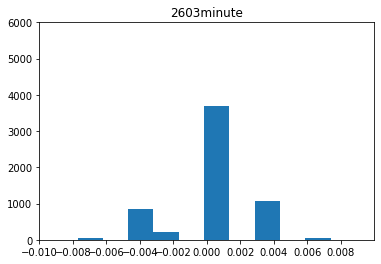

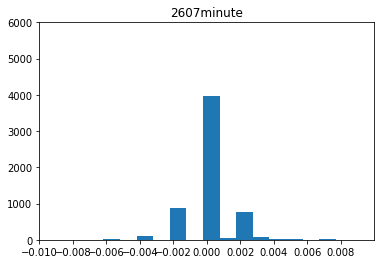

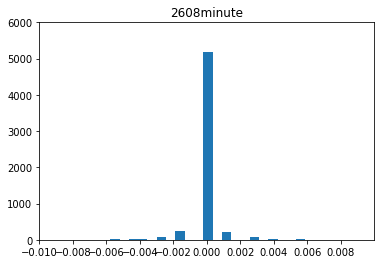

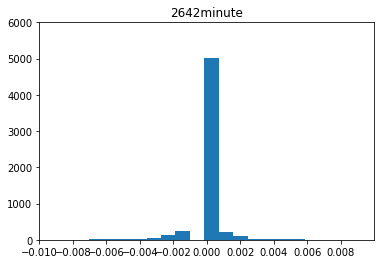

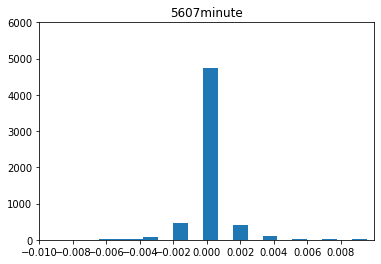

<Figure size 432x288 with 0 Axes>

In [303]:
#第一種直方圖 #單一圖形
unit = "minute"
for idx in range(len(data)):
  plt.hist(data[idx].RETURN, bins= 50)
  # plt.xticks(np.arange(-0.01, 0.01, 0.002))
  plt.xlim(-0.01,0.01)
  plt.ylim(0,6000)
  plt.title(list[idx] + unit)
  plt.savefig("./" + list[idx]+ unit +".png")
  plt.show()
  plt.clf()
#bins代表直方圖分佈區間個數，range用於設定直方圖的小矩形最大值與最小值

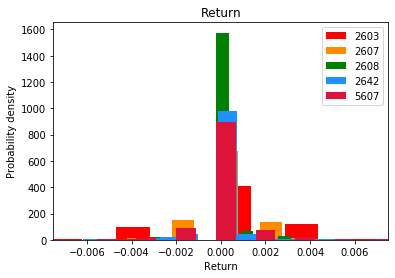

In [260]:
#第三種直方圖 
colorType = ['red','darkorange', 'g', 'dodgerblue','crimson']
for idx in range(len(data)):
  plt.hist(data[idx].RETURN, bins=50, density=True, label=list[idx],color = colorType[idx])
  plt.xlim(-0.0075,0.0075)

plt.legend()
plt.xlabel('Return')
plt.ylabel('Probability density')
plt.title("Return")
plt.savefig("./" + unit +".png")